# Scientific Question: How structurally similar are the active domain of murine coagulation FVIII and human coagulation FVIII in terms of its interaction with VWF?

Coagulation Factor VIII background: 

VWF:

# Hypothesis: If murine coagulation FVIII is sequentially and structurally similar to human FVIII, then mouse model missing FVIII would have symptoms that are similar to human hemophila A patients.

Multiple sequence alignment, Sequence logo to find the key different amino acid sequence between mouse and human to determine if the difference is significant. PDB reading to show the 3D structure of the protein. 3D protein measurement to determine the key domain (domains for interaction with VWF and key AA identified in literatures)
Data source: NCBI(sequence), PDB(protein structure)

# Loading in Packages

Definition of Packages:
logomaker: 
Bio:
PDB:
SeqIO:
MafftCommandline:
AlignIO:
Mapplotlib.pyplot:
Numpy:
Seaborn:
Pandas:
Nglview:

In [1]:
pip install logomaker

Note: you may need to restart the kernel to use updated packages.


In [3]:
import Bio
from Bio import SeqIO
from Bio import PDB
from Bio.pairwise2 import format_alignment
from Bio.Align.Applications import MafftCommandline
from Bio import AlignIO
from Bio.PDB import *
import logomaker as lm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import nglview as nv

Fontconfig warning: ignoring UTF-8: not a valid region tag


# Bioinformatic Analysis

ID: EDL29229.1
Name: EDL29229.1
Description: EDL29229.1 coagulation factor VIII [Mus musculus]
Number of features: 0
Seq('MQIALFACFFLSLFNFCSSAIRRYYLGAVELSWNYIQSDLLSVLHTDSRFLPRM...QQY')
ID: AAA52420.1
Name: AAA52420.1
Description: AAA52420.1 coagulation factor VIII [Homo sapiens]
Number of features: 0
Seq('MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDARFPPRVP...DLY')
ID: NP_001164742.1
Name: NP_001164742.1
Description: NP_001164742.1 coagulation factor VIII [Oryctolagus cuniculus]
Number of features: 0
Seq('MQIELSTCFFVCILQLSFSATRRYYLGAVELSWDYMHSDLLSELHVDTRSPPRM...QLY')
ID: XP_011818598.1
Name: XP_011818598.1
Description: XP_011818598.1 PREDICTED: coagulation factor VIII [Colobus angolensis palliatus]
Number of features: 0
Seq('MQIELSTCFFLCLLRFCFSATRRYYLGAVELSWDYMQSDLGELPVDTRFPPRVP...ELY')


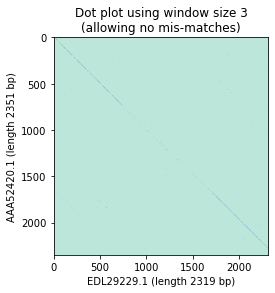

mafft Four_seq.fasta
['PPRVPRSFPFNTSVMYKKTVFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFP', 'PPRMPRSFPFNTSVIYKKTVFVEFTDQLFNIVKPRPPWMGLLGPTIWAEVHDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKIFP', 'PPRVPKSFPFNTSVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFP', 'LPRMSTSFPFNTSIMYKKTVFVEYKDQLFNIAKPRPPWMGLLGPTIWTEVHDTVVITLKNMASHPVSLHAVGVSYWKASEGDEYEDQTSQMEKEDDKVFP']


In [19]:
#Multiple Sequence Alignment
#Read in Fasta files of coagulation factor VIII from 4 species
Mouse_seq = SeqIO.read('Mouse_seq.fasta', 'fasta')
Human_seq = SeqIO.read('Human_seq.fasta', 'fasta')
Rabbit_seq = SeqIO.read('Rabbit_seq.fasta', 'fasta')
Angola_seq = SeqIO.read('Angola_seq.fasta', 'fasta')
#Check the read-in of sequences
print(Mouse_seq)
print(Human_seq)
print(Rabbit_seq)
print(Angola_seq)

#Dot plot between mouse and human FVIII for better visualization 
seq_mouse = str(Mouse_seq.seq).upper()
seq_human = str(Human_seq.seq).upper()
window = 3
data = [
    [
        (seq_mouse[i : i + window] != seq_human[j : j + window])
        for j in range(len(seq_mouse) - window)
    ]
    for i in range(len(seq_human) - window)
]
plt.imshow(data, cmap='icefire_r')
plt.xlabel("%s (length %i bp)" % (Mouse_seq.id, len(Mouse_seq)))
plt.ylabel("%s (length %i bp)" % (Human_seq.id, len(Human_seq)))
plt.title("Dot plot using window size %i\n(allowing no mis-matches)" % window)
plt.show()

#Mafft Multiple Sequence Alignment
mafft_exe = "/usr/local/bin/"
in_file = "Four_seq.fasta"
mafft_cline = MafftCommandline(input=in_file)
print(mafft_cline)
stdout, stderr = mafft_cline()
with open("aligned.fasta", "w") as handle:
    handle.write(stdout)
align = AlignIO.read("aligned.fasta", "fasta")

#Function to extract sequence from multiple sequence alignment into a list of sequence
Multi_seq = list()
def Seq_extract(alignment, Multi_seq):
    for align in alignment:
        seq = align.seq[50:150]
        seq_str = str(seq)
        Multi_seq.append(seq_str)
    return Multi_seq
Seq_list = list()
Seq_extract(align, Seq_list)
print(Seq_list)

In [6]:
#PDB reading
#Human PDB 6mf2.1
Human_FVIII_Parser = PDBParser()
Human_structure = Human_FVIII_Parser.get_structure("Human_FVIII", "Human_FVIII.pdb")
#Show structures
nv.show_biopython(Human_structure)

NGLWidget()

In [7]:
#Mouse PDB Homology modeling
Mouse_FVIII_Parser = PDBParser()
Mouse_structure = Mouse_FVIII_Parser.get_structure("Mouse_FVIII", "Mouse_FVIII.pdb")
nv.show_biopython(Mouse_structure)
# There is no Mouse FVIII available on the PDB website and I used homology modeling in Swiss Protein to use 
# 6mf2.1 as the template to model the structure of mouse FVIII. The Seq Identity is 82.58% GMQE is 0.34

NGLWidget()

In [8]:
#Human FVIII interaction with VWF
VWF_FVIII_Parser = PDBParser()
VWF_FVIII_structure = VWF_FVIII_Parser.get_structure("VWF_FVIII", "VWF_FVIII.pdb")
nv.show_biopython(VWF_FVIII_structure)
# Discontinuous is because this PDB file contasin two separate protein(VWF and FVIII) 

/Users/zhangminghao/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 16175.
  warnings.warn(
/Users/zhangminghao/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain V is discontinuous at line 16206.
  warnings.warn(


NGLWidget()

# Plotting the Results

Sequence logo
3D protein easurement

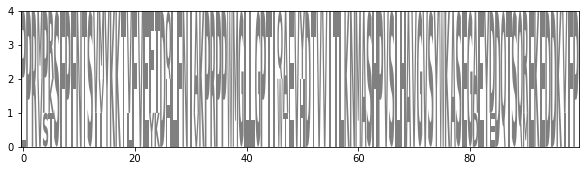

In [20]:
#Sequence Logo
# create counts matrix
Multi_counts_df = lm.alignment_to_matrix(sequences=Seq_list, to_type='counts', characters_to_ignore='.-X')
# preview counts dataframe
Multi_counts_df.head()
# show full Multi counts
lm.Logo(Multi_counts_df)

In [13]:
# 3D protein measurement
# Extract polypeptide from Human FVIII model
polypeptide_builder = CaPPBuilder()
counter = 1
for polypeptide in polypeptide_builder.build_peptides(Human_structure):
    Human_seq = polypeptide.get_sequence()
    print(f"Sequence: {counter}, Length: {len(Human_seq)}")
    print(Human_seq)
    counter += 1

Sequence: 1, Length: 19
ATRRYYLGAVELSWDYMQS
Sequence: 2, Length: 168
SVVYKKTLFVEFTDHLFNIAKPRPPWMGLLGPTIQAEVYDTVVITLKNMASHPVSLHAVGVSYWKASEGAEYDDQTSQREKEDDKVFPGGSHTYVWQVLKENGPMASDPLCLTYSYLSHVDLVKDLNSGLIGALLVCREGSLAKEKTQTLHKFILLFAVFDEGKSWHS
Sequence: 3, Length: 104
WPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEVHSIFLEGHTFLVRNHRQASLEISPITFLTAQTLLMDLGQFLLFCHISSHQHDGMEAYVKVDSCPE
Sequence: 4, Length: 180
KHPKTWVHYIAAEEEDWDYAPLVLAPDDRSYKSQYLNNGPQRIGRKYKKVRFMAYTDETFKTREAIQHESGILGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVRPLYSRRLPKGVKHLKDFPILPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFVNMERDLASGLIGPLLICYK
Sequence: 5, Length: 141
RNVILFSVFDENRSWYLTENIQRFLPNPAGVQLEDPEFQASNIMHSINGYVFDSLQLSVCLHEVAYWYILSIGAQTDFLSVFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWILGCHNSDFRNRGMTALLKVSSC
Sequence: 6, Length: 20
KKTRHYFIAAVERLWDYGMS
Sequence: 7, Length: 69
VPQFKKVVFQEFTDGSFTQPLYRGELNEHLGLLGPYIRAEVEDNIMVTFRNQASRPYSFYSSLISYEED
Sequence: 8, Length: 96
PRKNFVKPNETKTYFWKVQHHMAPTKDEFDCKAWAYFSDVDLEKDVHSGLIGPLLVCHTNTLNPAHGRQVTVQEFALFFTIFDETKSWYFTENMER

In [14]:
#Extract polypeptide from Human FVIII model
polypeptide_builder = CaPPBuilder()
counter = 1
for polypeptide_1 in polypeptide_builder.build_peptides(Mouse_structure):
    Mouse_seq = polypeptide_1.get_sequence()
    print(f"Sequence: {counter}, Length: {len(Mouse_seq)}")
    print(Mouse_seq)
    counter += 1

Sequence: 1, Length: 918
AIRRYYLGAVELSWNYIQSDLLSVLHTDSRFLPRMSTSFPFNTSIMYKKTVFVEYKDQLFNIAKPRPPWMGLLGPTIWTEVHDTVVITLKNMASHPVSLHAVGVSYWKASEGDEYEDQTSQMEKEDDKVFPGESHTYVWQVLKENGPMASDPPCLTYSYMSHVDLVKDLNSGLIGALLVCKEGSLSKERTQMLYQFVLLFAVFDEGKSWHSETNDSYTQSMDSASARDWPKMHTVNGYVNRSLPGLIGCHRKSVYWHVIGMGTTPEIHSIFLEGHTFFVRNHRQASLEISPITFLTAQTLLIDLGQFLLFCHISSHKHDGMEAYVKVDSCPEESQWQKKNNNEEMEDYDDDLYSEMDMFTLDYDSSPFIQIRSVAKKYPKTWIHYISAEEEDWDYAPSVPTSDNGSYKSQYLSNGPHRIGRKYKKVRFIAYTDETFKTRETIQHESGLLGPLLYGEVGDTLLIIFKNQASRPYNIYPHGITDVSPLHARRLPRGIKHVKDLPIHPGEIFKYKWTVTVEDGPTKSDPRCLTRYYSSFINPERDLASGLIGPLLICYKESVDQRGNQMMSDKRNVILFSIFDENQSWYITENMQRFLPNAAKTQPQDPGFQASNIMHSINGYVFDSLELTVCLHEVAYWHILSVGAQTDFLSIFFSGYTFKHKMVYEDTLTLFPFSGETVFMSMENPGLWVLGCHNSDFRKRGMTALLKVSSCDKSTSDYYEEIYEDIPTQLVNENNVIDPRSFFQNTNHPNTRKKKFKDSTIPKNDMEKIEPQFEEIAEMLKVQSVSVSDMLMLLGQSHPTPHGLFLSDGQEAIYEAIHDDHSPNAIDSNEGPSKVTQLRPESHHSEKIVFTPQPGLQLRSNKSLETTIEVKWKKLGLQVSSLPSNLMTTTILSDNLKATFEKTDSSGFPDMPVHSSSK
Sequence: 2, Length: 1381
LSTTAFGKKAYSLVGSHVPLNVSEENSDSN

In [15]:
# Conduct protein Analysis on Human and mouse FVIII
Analyzed_Hum = ProteinAnalysis(str(Human_seq))
Analyzed_Mou = ProteinAnalysis(str(Mouse_seq))
# Get Gravy value for the Human sequence that is extracted from Human FVIII model
# A higher value is more hydrophobic. A lower value is more hydrophilic.
print(Analyzed_Hum.gravy())
# Get Gravy value for the Human sequence that is extracted from Mouse FVIII model
# A higher value is more hydrophobic. A lower value is more hydrophilic.
print(Analyzed_Mou.gravy())

-0.23482352941176488
-0.5979000724112971


In [18]:
# Analyze the secondary structure fraction of human FVIII
# helix, turn, sheet
Analyzed_Hum.secondary_structure_fraction()

(0.3247058823529412, 0.24941176470588236, 0.2188235294117647)

In [19]:
# Analyze the secondary structure fraction of mouse FVIII
# helix, turn, sheet
Analyzed_Mou.secondary_structure_fraction()

(0.2889210716871832, 0.2498189717595945, 0.21071687183200577)

# Analyzing the Results

The Sequence logo for now is not very illustrative since I am not focusing on the important domain for interacting with VWF (the AA sequence around Y1680). After doing so, I hope that the sequence logo can show the different AA compositions between those 4 species to see if mouse has different AAs (which is significant, if only mouse is different) in this region. If there are not many AAs significantly differently in this region, mouse and human FVIII are sequentially similar. By the PDB view of the two structures, the two domains that is mainly for interacting with VWF(shown in third 3D structure of the human FVIII and VWF interaction) are similar for human and mouse FVIII. For the 3D protein measurement, the fraction of secondary structure of both human and mouse FVIII are similar in terms of the Alpha helix, turn, and beta sheets. The simiar secondary structure between human and mouse FVIII can imply the structural similarlity. The GRAVY values for both human and mouse are similar, which means the hydrophobicity of these two proteins are similar. The hydrophobicity of proteins can affect the potential interactions between FVIII and VWF. Human and mouse FVIII possessing the similar hydrophobicity can imply similar interactions between VWF and FVIII. To sum up, human FVIII and mouse FVIII are structurally similary